In [1]:

import pandas as pd 
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import imgaug.augmenters as iaa

In [2]:
# ================================

# 1. Load dataset

# ================================

train_data = pd.read_csv('archive/sign_mnist_train.csv')
test_data = pd.read_csv('archive/sign_mnist_test.csv')

y_train = train_data['label']
X_train = train_data.drop('label', axis=1)

y_test = test_data['label']
X_test = test_data.drop('label', axis=1)


In [3]:
# ================================

# 2. Train/Validation split

# ================================

X_train, X_validate, y_train, y_validate = train_test_split( X_train,
y_train, test_size=0.2, random_state=42, stratify=y_train )

In [4]:
# ================================

# 3. Normalize

# ================================

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validate = scaler.transform(X_validate) 
X_test =scaler.transform(X_test)


In [ ]:
# ================================

# 4. Data augmentation for MLP

# ================================

# Reshape to images

X_train_imgs = X_train.reshape(-1, 28, 28)
# change type of X_train_imgs to float32 for imgaug
X_train_imgs = X_train_imgs.astype(np.float32)

# Augmentation includes rotation, translation, shear, brightness change
augmenter = iaa.Sequential([ iaa.Affine(rotate=(-15, 15),
                                         translate_percent={'x': (-0.1, 0.1), 'y': (-0.1, 0.1)}, shear=(-10,10)), 
                                         iaa.Multiply((0.8, 1.2)),])

# Create augmented images

aug_imgs = augmenter(images=X_train_imgs)
aug_imgs_flat = aug_imgs.reshape(-1, 784)

# Combine

X_train_aug = np.vstack([X_train, aug_imgs_flat])
y_train_aug =np.hstack([y_train, y_train])


print("Original training set size:", X_train.shape[0])
print("Augmented training set size:", X_train_aug.shape[0])


Original training set size: 21964
Augmented training set size: 43928


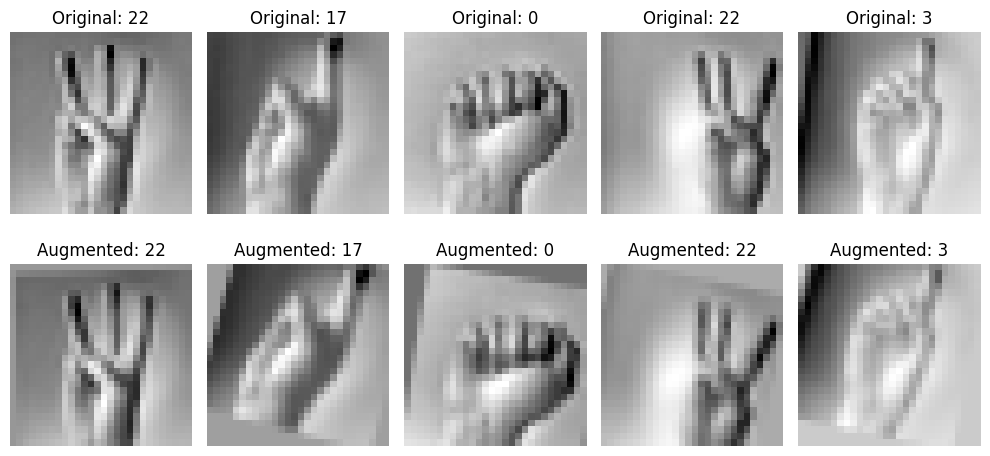

In [22]:
# print Examples of augmented images
import matplotlib.pyplot as plt
# change X_trian type to float64 before plot
# X_train_imgs = X_train_imgs.astype(np.float64)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i in range(5):
    axes[0, i].imshow(X_train_imgs[i], cmap='gray')
    axes[0, i].set_title(f'Original: {y_train.iloc[i]}')
    axes[0, i].axis('off')
    
    axes[1, i].imshow(aug_imgs[i], cmap='gray')
    axes[1, i].set_title(f'Augmented: {y_train.iloc[i]}')
    axes[1, i].axis('off')
plt.tight_layout()
plt.show()
# ================================


In [24]:
# ================================

# 5. Train MLP

# ================================

model = MLPClassifier( hidden_layer_sizes=(256, 128), activation='relu',solver='adam', max_iter=40, alpha=1e-4, verbose=True )

model.fit(X_train_aug, y_train_aug)

Iteration 1, loss = 1.10711129
Iteration 2, loss = 0.48754215
Iteration 3, loss = 0.33125111
Iteration 4, loss = 0.24227705
Iteration 5, loss = 0.18868861
Iteration 6, loss = 0.14547302
Iteration 7, loss = 0.11090612
Iteration 8, loss = 0.09330724
Iteration 9, loss = 0.07702907
Iteration 10, loss = 0.05755634
Iteration 11, loss = 0.05757843
Iteration 12, loss = 0.04995109
Iteration 13, loss = 0.05605123
Iteration 14, loss = 0.05031156
Iteration 15, loss = 0.03810998
Iteration 16, loss = 0.04693793
Iteration 17, loss = 0.03863962
Iteration 18, loss = 0.03301962
Iteration 19, loss = 0.05178137
Iteration 20, loss = 0.02941691
Iteration 21, loss = 0.04146672
Iteration 22, loss = 0.03796206
Iteration 23, loss = 0.03624235
Iteration 24, loss = 0.02275915
Iteration 25, loss = 0.02428411
Iteration 26, loss = 0.04000459
Iteration 27, loss = 0.05461362
Iteration 28, loss = 0.02138921
Iteration 29, loss = 0.02469270
Iteration 30, loss = 0.03084701
Iteration 31, loss = 0.02868502
Iteration 32, los

c:\Users\30697\miniconda3\envs\compgeo2025\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(256, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,40
,shuffle,True
,random_state,None


In [26]:
# ================================

# 6. Evaluation

# ================================

print("“Training accuracy:”", model.score(X_train_aug, y_train_aug))
print("“Validation accuracy:”", model.score(X_validate, y_validate))
y_pred =  model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print("“Test accuracy:”", test_acc)

print("Report on Test Data:")
print(classification_report(y_test,model.predict(X_test)))

“Training accuracy:” 0.9896876707339283
“Validation accuracy:” 0.9992715352394828
“Test accuracy:” 0.9086726157278304
Report on Test Data:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       331
           1       1.00      0.89      0.94       432
           2       0.92      0.98      0.95       310
           3       0.88      1.00      0.94       245
           4       0.87      1.00      0.93       498
           5       1.00      1.00      1.00       247
           6       0.92      0.88      0.90       348
           7       0.98      0.96      0.97       436
           8       1.00      0.99      0.99       288
          10       0.88      0.93      0.91       331
          11       0.83      1.00      0.91       209
          12       0.91      0.83      0.86       394
          13       0.93      0.81      0.87       291
          14       0.96      0.91      0.94       246
          15       0.98      1.00      0.99       

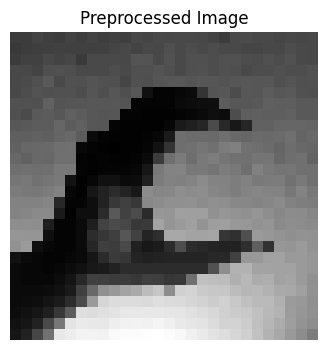

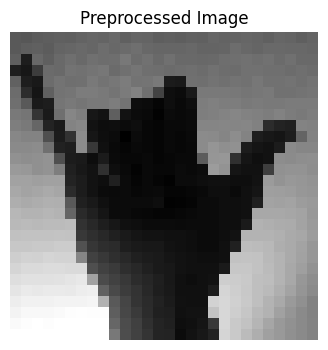

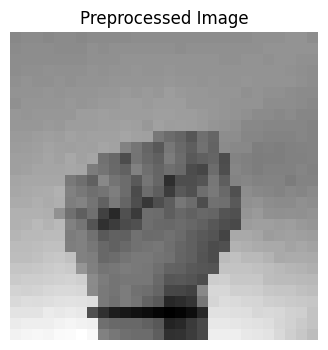

Predicted label for image 1: C
Predicted label for image 2: F
Predicted label for image 3: Y


In [39]:
import cv2
import numpy as np

def preprocess_image_for_model(path):
    # Load image
    img = cv2.imread(path)
    if img is None:
        raise ValueError("Image not found or path incorrect")

    # Convert to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Resize to 28x28 (MNIST format)
    img = cv2.resize(img, (28, 28))
    
    #Plot the processed image
    plt.figure(figsize=(4,4))
    plt.imshow(img, cmap='gray')
    plt.title("Preprocessed Image")
    plt.axis('off')
    plt.show()
    # Apply binary thresholding
    _, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)  
    
    # Invert colors if your hand is dark and background is light
    # # Comment this out if your hand is white on black
    # img = 255 - img

    # Normalize to 0..1
    img = img.astype("float32") / 255.0

    # Flatten into shape (1, 784)
    img = img.reshape(1, 784)
    


    return img

# Example:
test_img = preprocess_image_for_model("test_images/test_image.jpeg")
test_img2 = preprocess_image_for_model("test_images/test_image2.jpeg")
test_img3 = preprocess_image_for_model("test_images/test_image3.jpeg")


prediction = model.predict(test_img)
prediction2 = model.predict(test_img2)
prediction3 = model.predict(test_img3)




label_to_letter = {i: chr(65 + i) for i in range(26)}
print("Predicted label for image 1:",label_to_letter[prediction[0]])
print("Predicted label for image 2:",label_to_letter[prediction2[0]])
print("Predicted label for image 3:",label_to_letter[prediction3[0]])

